# EDA - Titanic

```
PassengerId type should be integers
Survived Survived or Not
Pclass Class of Travel
Name Name of Passenger
Sex Gender
Age
SibSp Number of Sibling/Spouse aboard
Parch Number of Parent/Child aboard
Ticket
Fare
Cabin
EmbarkedThe port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstow
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Découverte des données

In [2]:
df = pd.read_csv('datas/titanic.csv', index_col=0)

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
print("Le dataset comporte {} samples et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset comporte 891 samples et 11 variables.


In [7]:
df_col = df.columns.tolist()
df_col

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

On peut séparer les colonnes par types de variables :

In [8]:
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin']
text_vars = ['Name', 'Ticked']
num_vars = ['Age', 'Fare']

In [9]:
df.describe()
# df.describe(include='all')

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 2. Données manquantes et dupliquées

Avons-nous des valeurs dupliquées ?

In [11]:
df.duplicated().sum()

0

Nous constatons que le `count` n'est pas le même partout. Voyons les valeurs manquantes.

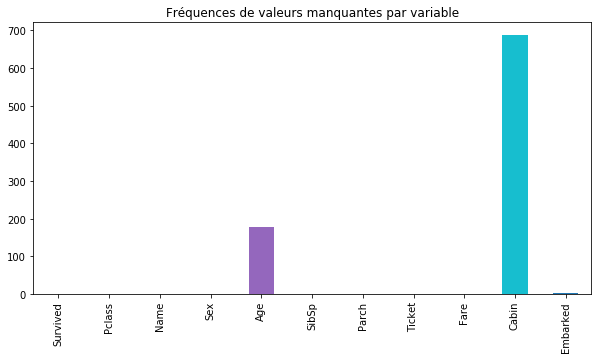

In [12]:
df.isna().sum().plot.bar(
    title='Fréquences de valeurs manquantes par variable',
    figsize=(10,5))

Nous avons beaucoup de valeurs manquantes semble-t'il sur `Cabin`. Voyons cela comparé aux autres :

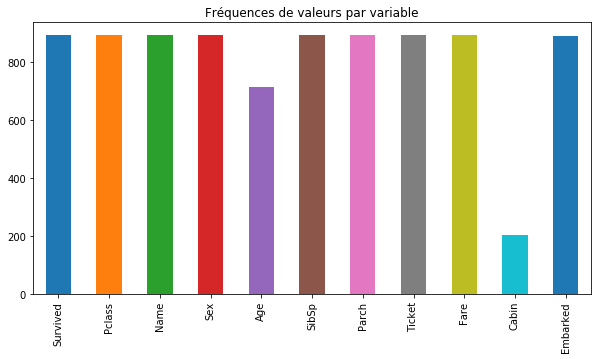

In [13]:
df.count().plot.bar(
    title='Fréquences de valeurs par variable',
    figsize=(10,5))

In [14]:
cabin_pc = df['Cabin'].count() / len(df) * 100.
cabin_pc

22.895622895622896

Nous pouvons donc nous passer de la colonne `Cabin` qui n'est présent que pour environ 22.9% des samples du dataset. 

In [15]:
df_wocabin = df.drop(labels='Cabin', axis=1)

Pour la variable `Age`, nous pouvons remplacer les valeurs par la moyenne par exemple.

In [16]:
mean_Age = df_wocabin.Age.mean()
# df_wocabin.loc[df_wocabin.Age.isna(), 'Age'] = mean_Age
# Ou
df_wocabin.Age.fillna(mean_Age, inplace=True)
df_wocabin.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

> **Note** : `fillna` permet beaucoup plus de flexibilité comme interpoler des valeurs, choisir la valeur précédente ou suivante - pour des séries temporelles par exemple, etc.

## 3. Outliers

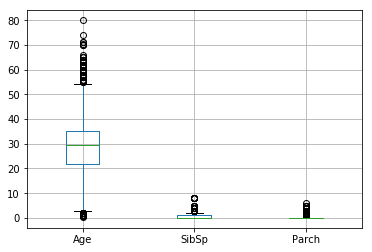

In [17]:
df_wocabin.boxplot(['Age',
 'SibSp',
 'Parch'])

Nous avons à priori quelques outliers sur `Age`. Mais est-ce que cela est pertinent de les faire disparaître ? L'âge pourrait avoir une influence sur la survie...

## 4. Analyse univariée

Regardons la variable que nous devrons prédire :

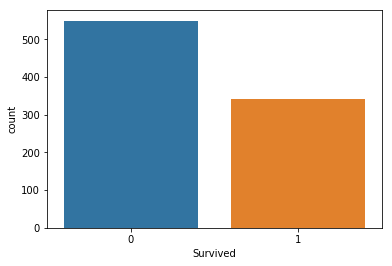

In [18]:
sns.countplot(df['Survived'])

Nombre de passagers par classe :

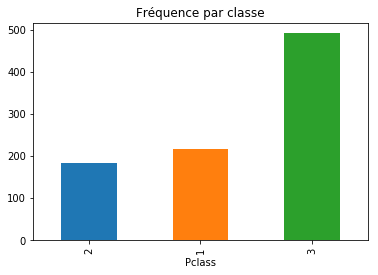

In [19]:
df_wocabin.groupby('Pclass')['Pclass'].count().sort_values().plot.bar(title='Fréquence par classe')

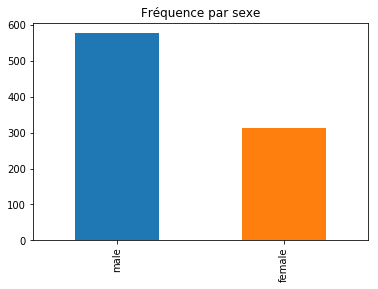

In [20]:
df_wocabin['Sex'].value_counts().plot.bar(title='Fréquence par sexe')

Il y a deux fois plus d'hommes que de femmes.

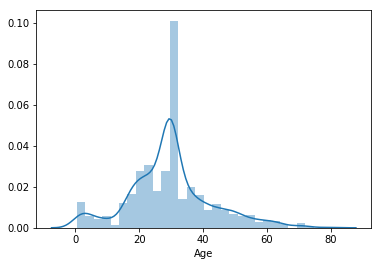

In [21]:
sns.distplot(df_wocabin['Age'].dropna())

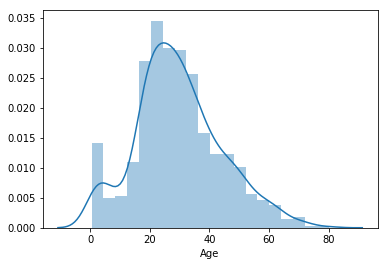

In [22]:
sns.distplot(df['Age'].dropna())

In [23]:
age = df['Age'].dropna()

In [24]:
age.mean()

29.69911764705882

In [25]:
age.mode()

0    24.0
dtype: float64

In [26]:
age.median()

28.0

In [27]:
age.skew()

0.38910778230082693

In [28]:
age.kurtosis()

0.1782741536421022

## 5. Analyse multivarié

Je peux faire un plot pour chaque variables ou bien aussi tenter de créer des fonctions qui permettent d'aller plus vite :

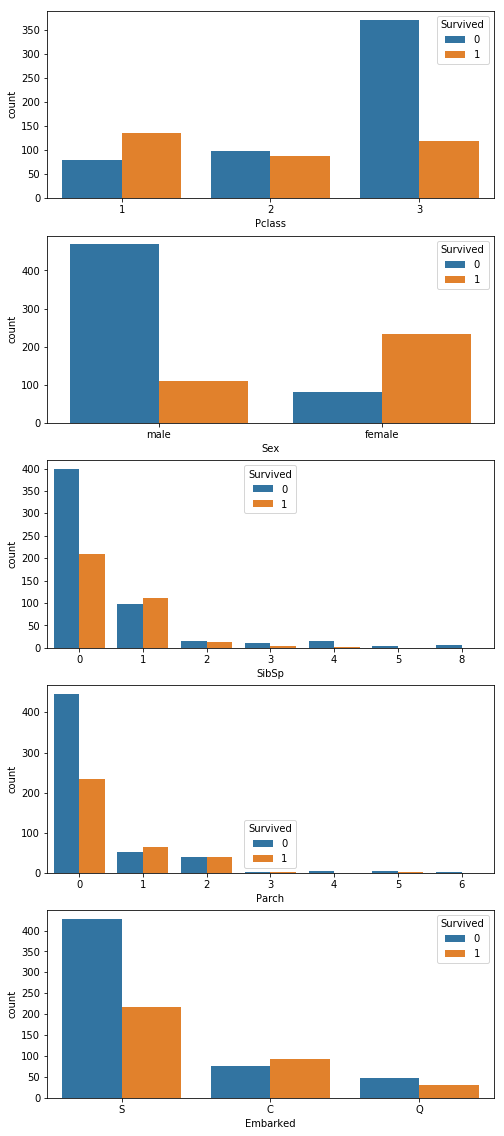

In [29]:
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axs = plt.subplots(nrows=5, figsize=(8,20), sharex=False)
for i in range(5):
    sns.countplot(x=cat_vars[i], data=df_wocabin, hue='Survived', ax=axs[i])

Cela permet de visualiser rapidement les variables catégoriques. On constate aussi que SibSp et Parch sont asymétrique et cela affectera le model.

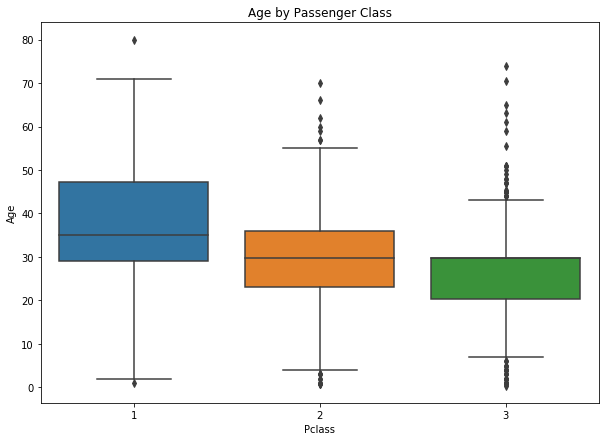

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data=df_wocabin).set_title('Age by Passenger Class')
plt.show()

Nous observons que les passagers de premières classes sont plus âgés que les deux autres classes.

On peut aussi choisir de prendre la moyenne d'âge de chaque classe pour compléter les valeurs manquantes.

In [ ]:
def change_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    Mean_age_pclass1 = cols[cols['Pclass'] == 1].Age.mean()
    Mean_age_pclass2 = cols[cols['Pclass'] == 2].Age.mean()
    Mean_age_pclass3 = cols[cols['Pclass'] == 3].Age.mean()
    if pd.isnull(Age):
        if Pclass == 1:
            return Mean_age_pclass1
        elif Pclass == 2:
            return Mean_age_pclass2
        else:
            return Mean_age_pclass3
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(change_age, axis=1)

Du coup, pouquoi pas regarder le taux de survie moyen par class ?

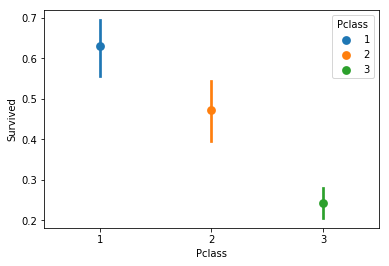

In [32]:
# Montre estimation de la tendance centrale avec un intervalle d'incertitude
sns.pointplot(x="Pclass", y="Survived", hue="Pclass", data=df)

Il vaut mieux être en première classe qu'en 3ème !

Age, Pclass par Survived :

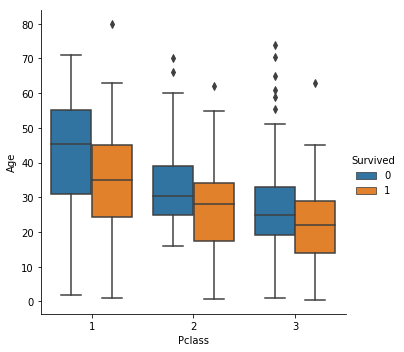

In [33]:
# sns.catplot(x="Pclass", y="Age", hue="Survived", data=df_wocabin, kind="box")
sns.catplot(x="Pclass", y="Age", hue="Survived", data=df, kind="box")

On constate que Fare permet de discriminer la survie des passager de class 1 :

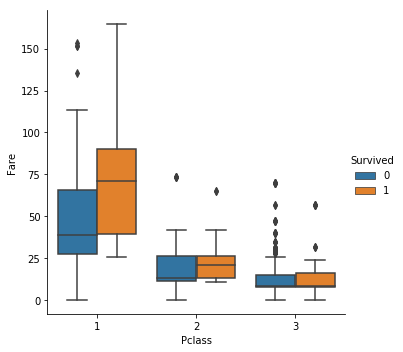

In [34]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", data=df[df['Fare'] < 200], kind="box")

In [35]:
df.loc[:, 'logFare'] = np.log1p(df.Fare) # np.log1p évite de retourner 0
# Et évite ainsi une erreur car log(0) tend vers -inf
# là on décale log vers la gauche : pratique quand on a des valeurs [0,inf]

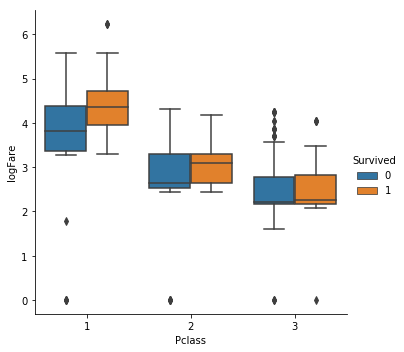

In [36]:
sns.catplot(x="Pclass", y="logFare", hue="Survived", data=df, kind="box")

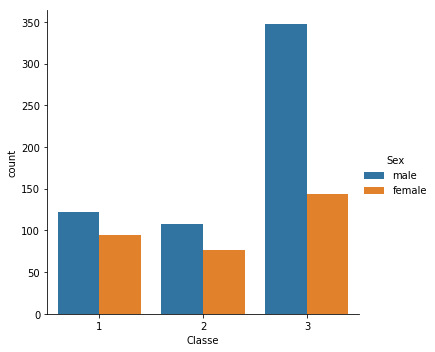

In [37]:
ax = sns.catplot('Pclass', data=df_wocabin, hue='Sex', kind='count')
ax.set_xlabels('Classe')

Créer une variable avec ou sans famille.

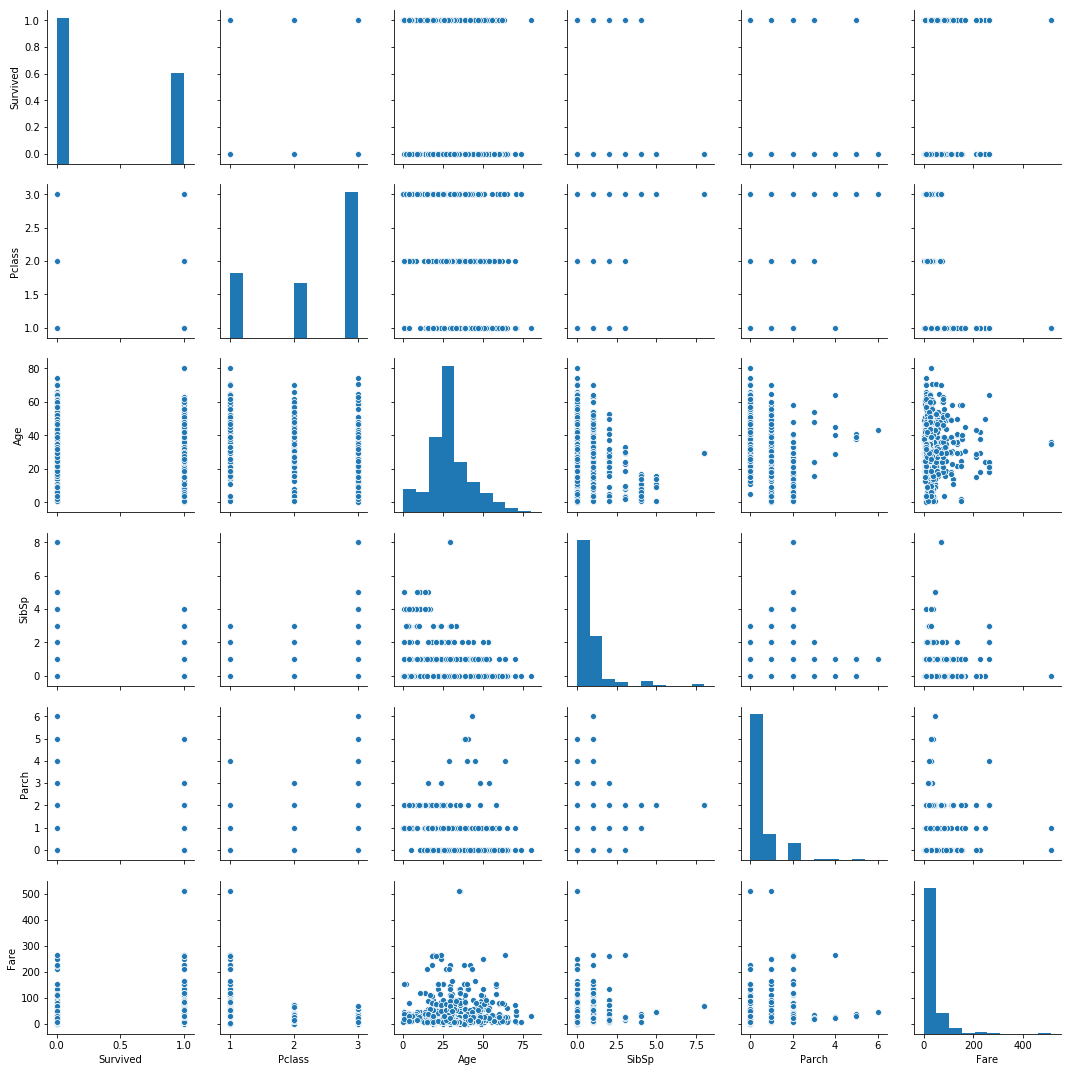

In [38]:
sns.pairplot(df_wocabin)

In [39]:
df_wocabin.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


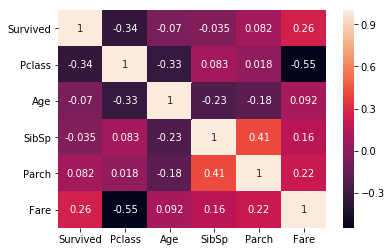

In [40]:
sns.heatmap(df_wocabin.corr(), annot=True)

## 6 - Conclusion

L'âge et la classe semblent être déterminants dans la survie ou non.